## LOAN PREDICTION USING MACHINE LEARNING MODELS

### Introduction

In the **Financial sector**, evaluating loan applications efficiently and accurately is crucial to minimizing **credit risk** and maintaining **profitability**. Traditional manual assessment methods are often time-consuming and prone to human bias, leading to inconsistent decisions. With the growing availability of **customer data**, machine learning techniques offer a powerful alternative for automating and improving the accuracy of loan approval decisions. By analyzing key indicators such as **Income**, **Credit_Score**, **Debt-To-Income Ratio**, and **Employment_Status**, predictive models can help financial institutions make **faster**, **fairer**, and more **informed decisions**. This study addresses the relevance of leveraging data-driven models in enhancing credit assessment processes.

### Objective :

The primary objective of this project is to develop and compare predictive models—specifically Logistic Regression and Decision Tree classifiers to determine whether a **Loan Application** should be **Approved** or **Rejected**. The aim is to **Support Risk Management** by identifying patterns in **historical loan data** obtained from **Kaggle website**, enabling better decision-making and improving operational efficiency in lending practices.

In [180]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [182]:
loan = pd.read_excel("C:/Users/MERLIN/Downloads/Loan_Prediction_Clean_Data.xlsx")
loan.head()

,Text,Income,Credit_Score,Loan_Amount,DTI_Ratio,Employment_Status,Approval
0,I need a loan to pay for an international vaca...,26556,581,8314,79.26,employed,Rejected
1,I want to make home improvements like installi...,197392,389,111604,22.14,employed,Rejected
2,I need a loan for home renovation including a ...,44561,523,34118,45.44,employed,Rejected
3,I need funds to buy new furniture and applianc...,190363,729,118757,10.22,unemployed,Rejected
4,I need a loan to start a small business.,61853,732,19210,44.13,employed,Approved


Our dataset is made up of **Structured Data** and **Unstructured Data** and the differents variables are described below : 

**Structured Data Description**
This dataset contains the following structured features related to loan applications:

- **Income (integert)** : Applicant's total income.
- **Credit Score (integer)** : Numerical representation of the applicant’s creditworthiness.
- **Loan Amount (integer)** : Amount requested by the applicant as a loan.
- **Debt-to-Income Ratio (float)** : The ratio of the applicant’s total debt to their income, indicating financial stability.
- **Employment Status (categorical)** : Current employment condition of the applicant (e.g., Employed, Unemployed).
- **Approval (categorical)** : Enable us to know if the loan was Approved or Rejected

**Unstructured Data**
- **Text Description (string)** : The applicant’s narrative describing their financial situation, suitable for text mining analysis.

In [185]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Text               24000 non-null  object 
 1   Income             24000 non-null  int64  
 2   Credit_Score       24000 non-null  int64  
 3   Loan_Amount        24000 non-null  int64  
 4   DTI_Ratio          24000 non-null  float64
 5   Employment_Status  24000 non-null  object 
 6   Approval           24000 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 1.3+ MB


<Axes: >

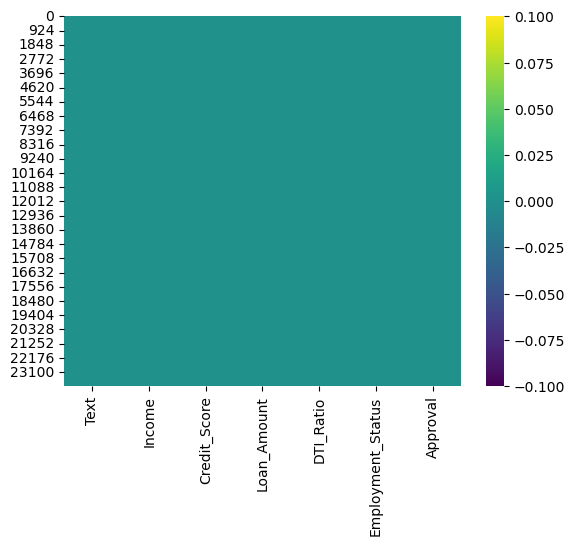

In [187]:
#Visual detection of undefined values
sns.heatmap(loan.isnull(),cmap='viridis')

Our heatmap show's that there are no undefined values in our dataset "Loan" hence no data cleaning required. 

- In this project we will not make use of the Text column. It's investigaton will be used later in order to see if this column provides valuable information or not to the loan request.

In [191]:
## Drop the "Text" column
loan.drop('Text',axis=1,inplace=True)

In [193]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Income             24000 non-null  int64  
 1   Credit_Score       24000 non-null  int64  
 2   Loan_Amount        24000 non-null  int64  
 3   DTI_Ratio          24000 non-null  float64
 4   Employment_Status  24000 non-null  object 
 5   Approval           24000 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 1.1+ MB


- `Now we can perform the differents analysis on our dataset in order to realise our project.`

In [196]:
# Assume your DataFrame is named 'data'
# Extract numerical variables (columns with numeric data types)
numeric_vars = loan.select_dtypes(include=['number']).columns.tolist()

# Extract categorical variables (columns with non-numeric data types)
categorical_vars = loan.select_dtypes(exclude=['number']).columns.tolist()

print("Numerical Variables:", numeric_vars)
print("Categorical Variables:", categorical_vars)


Numerical Variables: ['Income', 'Credit_Score', 'Loan_Amount', 'DTI_Ratio']
Categorical Variables: ['Employment_Status', 'Approval']


## Case of Categorical Variables

In [199]:
# Show unique values (classes) in each column
for col in categorical_vars:
    print(f"Unique classes in '{col}':")
    print(loan[col].unique())
    print("-" * 40)

Unique classes in 'Employment_Status':
['employed' 'unemployed']
----------------------------------------
Unique classes in 'Approval':
['Rejected' 'Approved']
----------------------------------------


#### Let's provide some statistics about Categorical variables

In [202]:
for col in categorical_vars:
    print(f"--- Nomber of appearances '{col}' ---")
    print(loan[col].value_counts())
    print("\n")

--- Nomber of appearances 'Employment_Status' ---
Employment_Status
unemployed    12007
employed      11993
Name: count, dtype: int64


--- Nomber of appearances 'Approval' ---
Approval
Rejected    20067
Approved     3933
Name: count, dtype: int64




- The most common category for **Employment_Status** is **unemployed**, appearing **12007** times, which is approximately **50.03%** of the data.
- The **Approval** variable has **Rejected** being the predominant category, occurring **20067** times. This represents about **83.61%** of the entries.

#### Graphical representation of Categorical variables through the use of Pie plots.

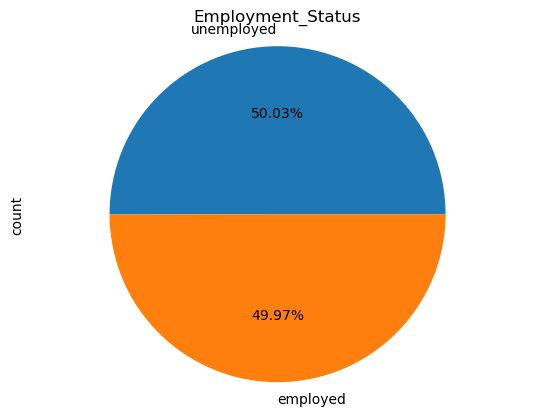

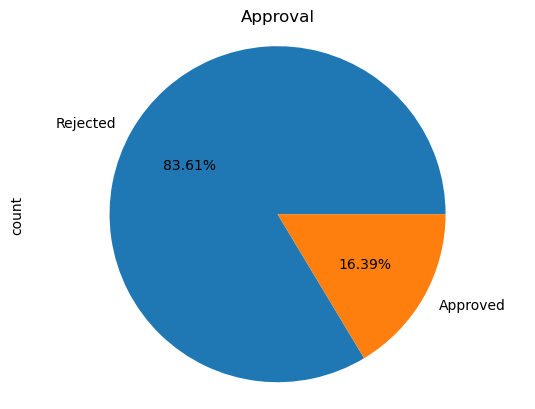

In [206]:
#Providing Pie plots of categorical variables
for var in categorical_vars:
    loan[var].value_counts().plot(kind='pie', autopct='%1.2f%%')
    plt.title(var)
    plt.axis('equal')
    plt.show()

#### Let's provide some statistics about Numeric variables

In [209]:
loan[numeric_vars].describe()

,Income,Credit_Score,Loan_Amount,DTI_Ratio
count,24000.000000,24000.000000,24000.000000,24000.000000
mean,110377.552708,575.720333,44356.154833,34.719167
std,51729.677627,159.227621,34666.604785,32.322471
min,20001.000000,300.000000,1005.000000,2.530000
25%,65635.750000,437.000000,16212.000000,14.507500
50%,110464.000000,575.000000,35207.000000,24.860000
75%,155187.000000,715.000000,65622.750000,41.840000
max,200000.000000,850.000000,158834.000000,246.330000


The descriptive statistics provided above enable us to have the following overview of our dataset :

1. **Income (Annual Income in $)**
   
- **Mean**: Approximately $110,378

- **Standard Deviation**: $51,730 which show's a wide range of incomes.

- **Median (50%)**: $110,464 which is very close to the mean suggesting a **fairly symmetric distribution**

**Information** : The dataset includes individuals from a broad income spectrum, ranging from modest earners to high-income individuals.

2. **Credit_Score**
   
- **Mean**: 576

- **Standard Deviation**: 159 — indicates high variability

- **Median**: 50% of individuals have a score below **575**

**Information**: Many individuals fall in the low-to-mid credit score range, implying potential credit risk.

3. **Loan_Amount**
   
- **Mean**: Approximately $44,356

- **Standard Deviation**: $34,667 indicating large variation in loan requests

- **Median**: $35,207

**Information**: The loan amounts vary significantly, suggesting a mix of small personal loans and large financial products.

4. **DTI_Ratio (Debt-to-Income Ratio in %)**
   
- **Mean**: 34.7 showing a moderately high average

- **Max**: 246 — some individuals have debt well beyond their income

- 25% have a DTI < 14.5  indicating a segment with low debt burden

**Information**: There's a wide range in debt burdens; some individuals are heavily indebted, increasing their default risk.

#### Graphical representation of Numeric variables through the use of Box plots.

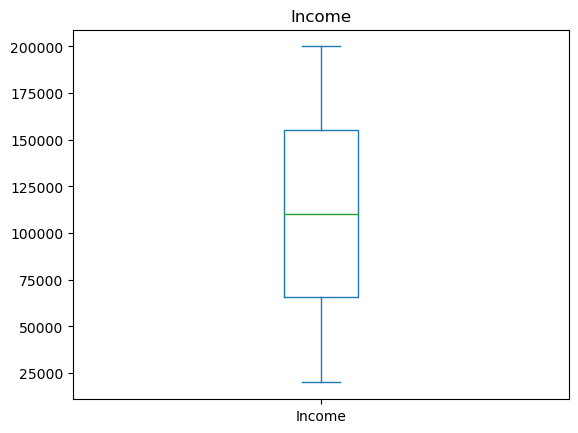

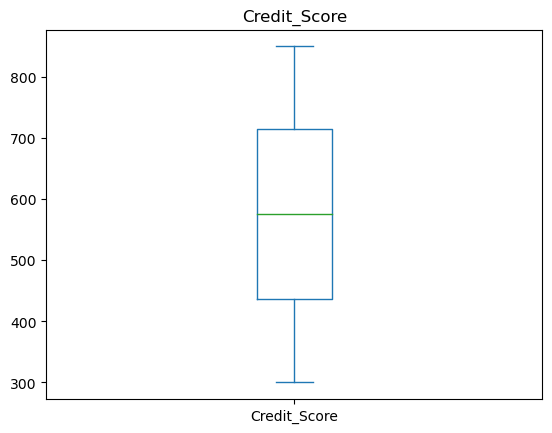

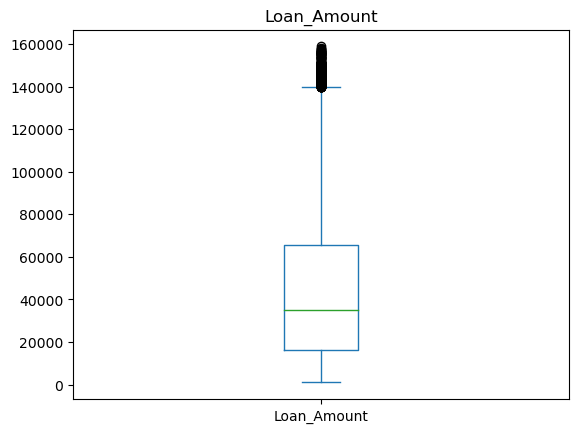

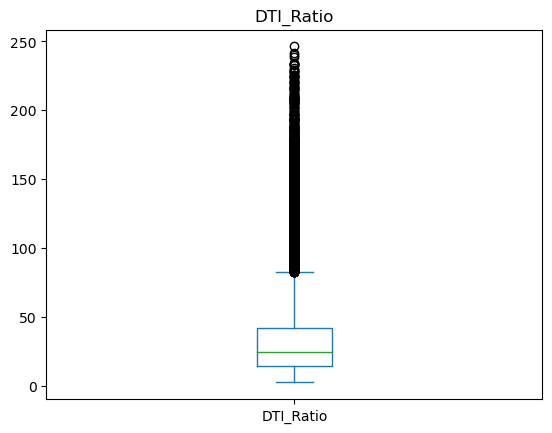

In [213]:
#Boxplot of numeric variables
for var in numeric_vars:
    loan[var].plot(kind='box')
    plt.title(var)
    plt.show()

The wide variability observed in **DTI_Ratio** can be explained based on the customer financial situation and that of the **Loan_Amount** can be explained by the fact that each customer request a loan for a particular reason. 

#### Bivariate Analysis and variable selection

##### Graphical representation of Approval Vs Categorical Variables

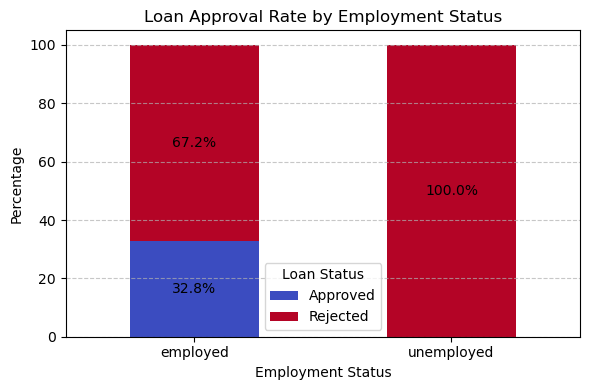

In [218]:
# Providing the percentages
cross_tab = pd.crosstab(loan['Employment_Status'], loan['Approval'], normalize='index') * 100

# creating the graph
ax = cross_tab.plot(kind='bar', stacked=True, figsize=(6, 4), colormap='coolwarm')

# Adding the proportions on the bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.1f}%', 
                    (p.get_x() + p.get_width() / 2, p.get_y() + height / 2),
                    ha='center', va='center', fontsize=10, color='black')

# Graph
plt.title('Loan Approval Rate by Employment Status')
plt.ylabel('Percentage')
plt.xlabel('Employment Status')
plt.legend(title='Loan Status')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


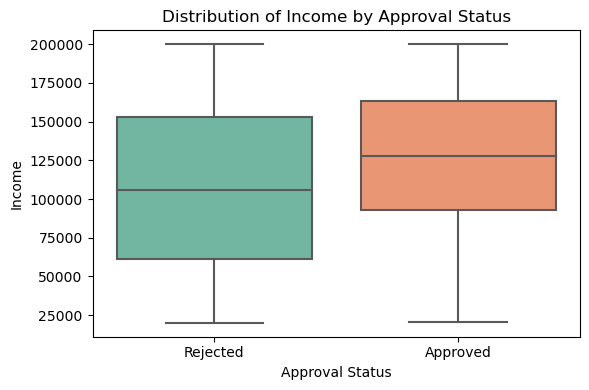

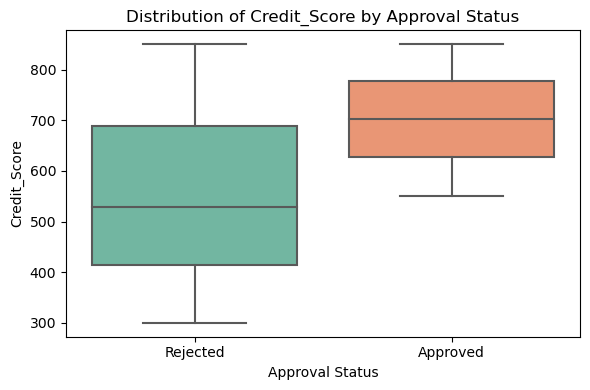

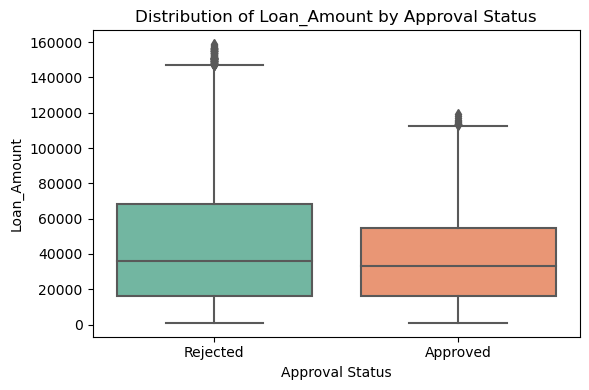

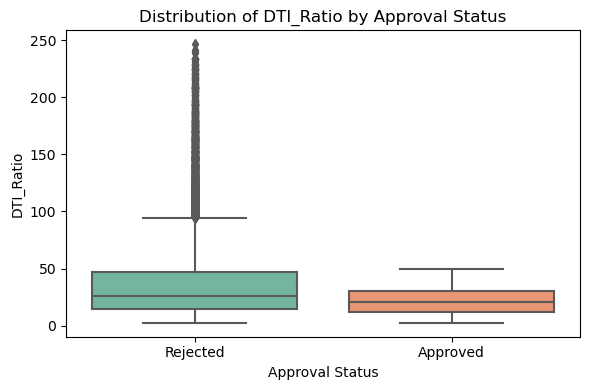

In [220]:
# Définir une palette de couleurs adaptée (par exemple 'Set2', 'Set1', etc.)
palette = sns.color_palette("Set2")

# Providing boxplot for each Numeric variable
for i, var in enumerate(numeric_vars):
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Approval', y=var, data=loan, palette=palette)
    plt.title(f'Distribution of {var} by Approval Status')
    plt.xlabel('Approval Status')
    plt.ylabel(var)
    plt.tight_layout()
    plt.show()

### Variable Selection

#### Variable Encoding

In [224]:
# Map Yes/No to 1/0 for the categorical columns
loan['Approval'] = loan['Approval'].map({'Approved': 1, 'Rejected': 0})
loan['Employment_Status'] = loan['Employment_Status'].map({'employed': 1, 'unemployed': 0})
#data['Premium'] = data['Premium'].map({'yes': 1, 'no': 0})

# Verify the changes
print(loan.head())

   Income  Credit_Score  Loan_Amount  DTI_Ratio  Employment_Status  Approval
0   26556           581         8314      79.26                  1         0
1  197392           389       111604      22.14                  1         0
2   44561           523        34118      45.44                  1         0
3  190363           729       118757      10.22                  0         0
4   61853           732        19210      44.13                  1         1


##### Variable selection of Categorical variables

In [229]:
from scipy.stats import chi2_contingency
import numpy as np
# Variable of interest
cat_vars=['Employment_Status']

# Initialising the lists 
var_names = []
chi2_stats = []
p_values = []
cramer_vs = []
#decision = []

# Looping through Categorical variables
for var in cat_vars:
    # Calculating the contingence table
    contingency_table = pd.crosstab(loan['Approval'], loan[var])
    # Calculating Chi-square statistics and p-value
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    # Calculating Cramer value (V)
    n = contingency_table.sum().sum()
    phi2 = chi2/n
    r,k = contingency_table.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rc = r-((r-1)**2)/(n-1)
    kc = k-((k-1)**2)/(n-1)
    cramer_v = np.sqrt(phi2corr/min(rc-1,kc-1))
    # keeping the results in the lists provided
    var_names.append(var)
    chi2_stats.append(chi2)
    p_values.append(p)
    cramer_vs.append(cramer_v)
   # decisions.append("Accepted" if p < alpha else "Rejeted")

# Creating a dataframe for the results
results_df = pd.DataFrame({
    'Variable': var_names,
    'Chi2': chi2_stats,
    'P-valeur': p_values,
    'Cramer value (V)': cramer_vs,
   # 'Decision': decisions
})

# Sorting in ascending order based on Cramer value (V)
results_df.sort_values(by='Cramer value (V)', inplace=True,ascending=False)

# providing the results
print(results_df)

            Variable         Chi2  P-valeur  Cramer value (V)
0  Employment_Status  4706.940069       0.0          0.442819


There is a **statistically significant and relatively strong association** between **Employment_Status** and loan **Approval**. In other words, whether an applicant is **employed** or **unemployed** has a significant impact on the likelihood of their loan being **Approved** or **Rejected**.

#### Variable selection of Numeric variables

In [234]:
import scipy.stats as stats

num_vars = ['Credit_Score', 'DTI_Ratio', 'Income','Loan_Amount']
# Defining list to collect data
var_names = []
kw_stats = []
p_values = []
decisions = []

# Defining the significant level of alpha
alpha = 0.05

# Going through the numeric varaibles
for var in num_vars:
    # Seperating the Data based on the variable'Approval'
    groups = [loan[loan['Approval'] == 0][var], loan[loan['Approval'] == 1][var]]
    #  Kruskal-Wallis Test
    kw_stat, p = stats.kruskal(*groups)
    # Collecting the results
    var_names.append(var)
    kw_stats.append(kw_stat)
    p_values.append(p)
    decisions.append("Accepted" if p < alpha else "Rejeted")

# Creating a dataframe for the results
results_df = pd.DataFrame({
    'Variable': var_names,
    'Kruskal-Wallis': kw_stats,
    'P-valeur': p_values,
    'Decision': decisions
})

# sorting the results based on the p-value
results_df.sort_values(by='P-valeur', inplace=True)

# Tabular results
print(results_df)


       Variable  Kruskal-Wallis       P-valeur  Decision
0  Credit_Score     2955.491059   0.000000e+00  Accepted
1     DTI_Ratio      508.639033  1.254073e-112  Accepted
2        Income      440.321886   9.212796e-98  Accepted
3   Loan_Amount       72.848555   1.399900e-17  Accepted


In [236]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

X = loan[["Credit_Score", "DTI_Ratio", "Income", "Loan_Amount", "Employment_Status"]]
Y = loan["Approval"]

In [238]:
X=sm.add_constant(X)

In [240]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=60)

## methode1 : Logistic Model

In [243]:
# Providing the Logistic model 
from sklearn.linear_model import LogisticRegression
logit_model = sm.Logit(Y_train, X_train)

In [245]:
# Fitting the model to the training data
result = logit_model.fit()

         Current function value: 0.143943
         Iterations: 35


C:\Users\MERLIN\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [247]:
# Detailed Statistics
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:               Approval   No. Observations:                19200
Model:                          Logit   Df Residuals:                    19194
Method:                           MLE   Df Model:                            5
Date:                Sat, 17 May 2025   Pseudo R-squ.:                  0.6778
Time:                        14:41:39   Log-Likelihood:                -2763.7
converged:                      False   LL-Null:                       -8576.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -23.5436      4.698     -5.012      0.000     -32.751     -14.336
Credit_Score          0.0162      0.000     44.528      0.000       0.016       0.017
DTI_Ratio            -0.

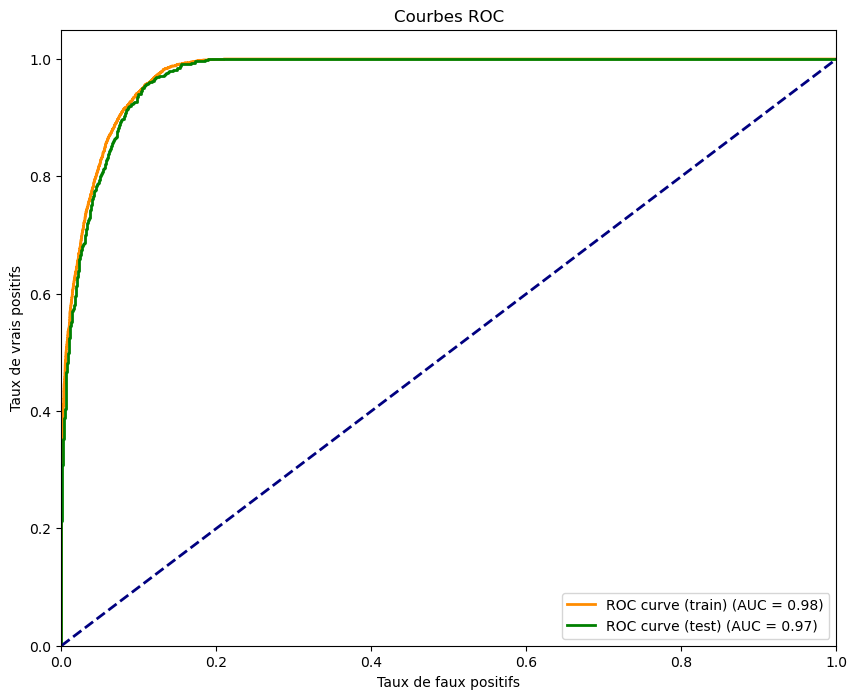

In [249]:
from sklearn.metrics import roc_curve, auc
# predictions based on train and test data
Y_train_pred = result.predict(X_train)
Y_test_pred = result.predict(X_test)

# ROC Curve and area under the curve (AUC)
fpr_train, tpr_train, thresholds_train = roc_curve(Y_train, Y_train_pred)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, thresholds_test = roc_curve(Y_test, Y_test_pred)
roc_auc_test = auc(fpr_test, tpr_test)

# ROC Curve
plt.figure(figsize=(10, 8))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='ROC curve (train) (AUC = %0.2f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='green', lw=2, label='ROC curve (test) (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend(loc="lower right")

In [251]:
from sklearn.metrics import confusion_matrix
Y_pred = result.predict(X_test) > 0.5
confusion_matrix = confusion_matrix(Y_test, Y_pred)
print(confusion_matrix)

[[3850  171]
 [ 179  600]]


In [253]:
TBC=(confusion_matrix[0,0]+confusion_matrix[1,1])/(confusion_matrix[0,0]+confusion_matrix[0,1]+confusion_matrix[1,0]+confusion_matrix[1,1])
TBC

0.9270833333333334

## Methode2 : Decision Tree

In [256]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


tree = DecisionTreeClassifier(random_state=60)
tree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=60)

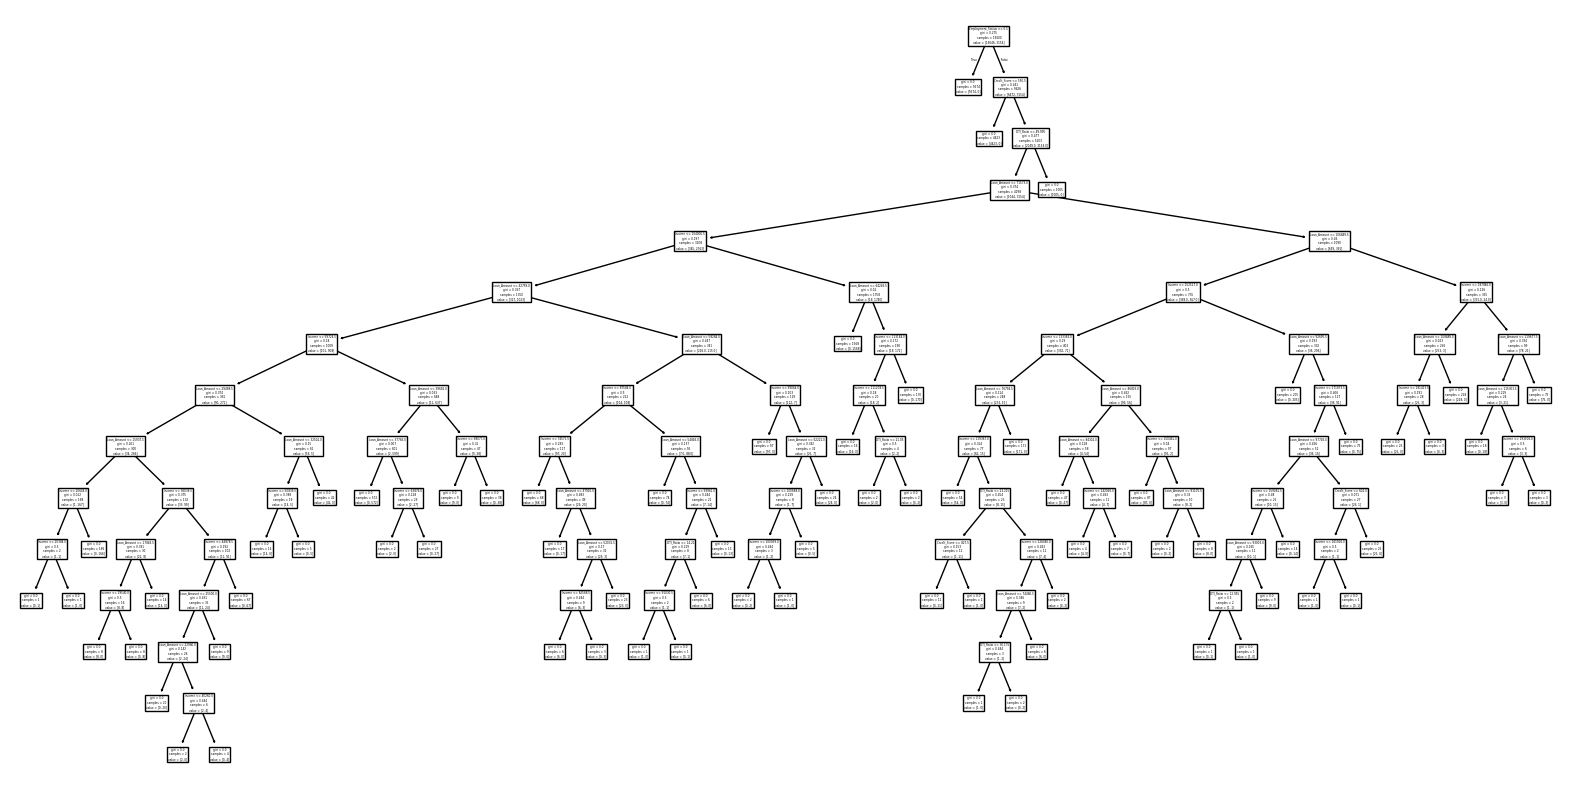

In [258]:
plt.figure(figsize=(20,10))
plot_tree(tree, feature_names=X.columns)
plt.show()

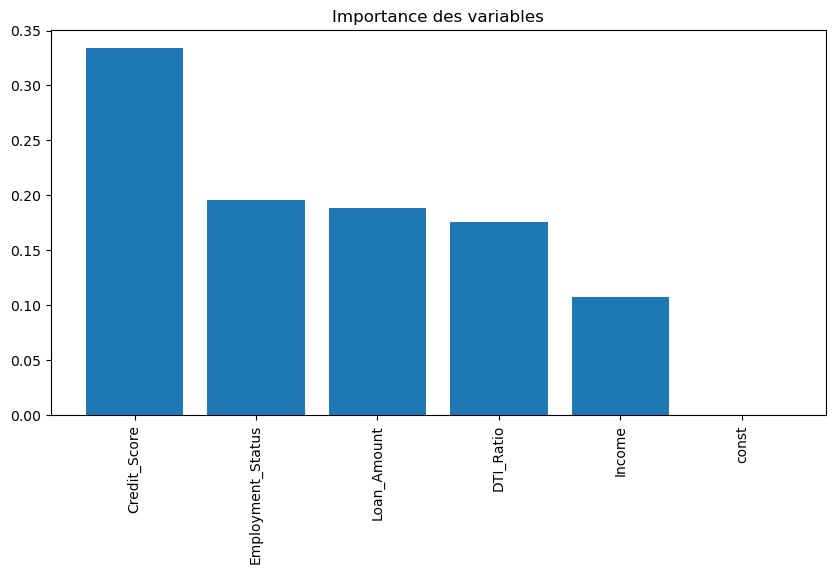

In [260]:
importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,5))
plt.title("Importance des variables")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), X.columns[indices], rotation=90)
plt.show()

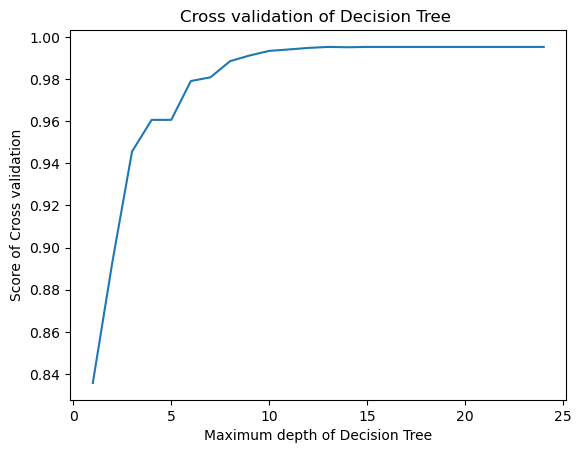

In [262]:
# testing maximum depth
max_depths = range(1, 25)

# List to get the Cross validation Score
cv_scores = []

# Train the model and give the score based on each maximum depth
for depth in max_depths:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    scores = cross_val_score(tree, X_train, Y_train, cv=10)
    cv_scores.append(np.mean(scores))

# Graph of Cross Validation
plt.plot(max_depths, cv_scores)
plt.xlabel('Maximum depth of Decision Tree')
plt.ylabel('Score of Cross validation')
plt.title('Cross validation of Decision Tree ')
plt.show()


In [264]:
# Maximum depth that provide the best Score
best_depth = max_depths[np.argmax(cv_scores)]
print('La meilleure profondeur maximale est :', best_depth)

La meilleure profondeur maximale est : 13


In [266]:
# Decision Tree with the maximum depth
tree = DecisionTreeClassifier(max_depth=13, random_state=60)
tree.fit(X_train, Y_train)


DecisionTreeClassifier(max_depth=13, random_state=60)

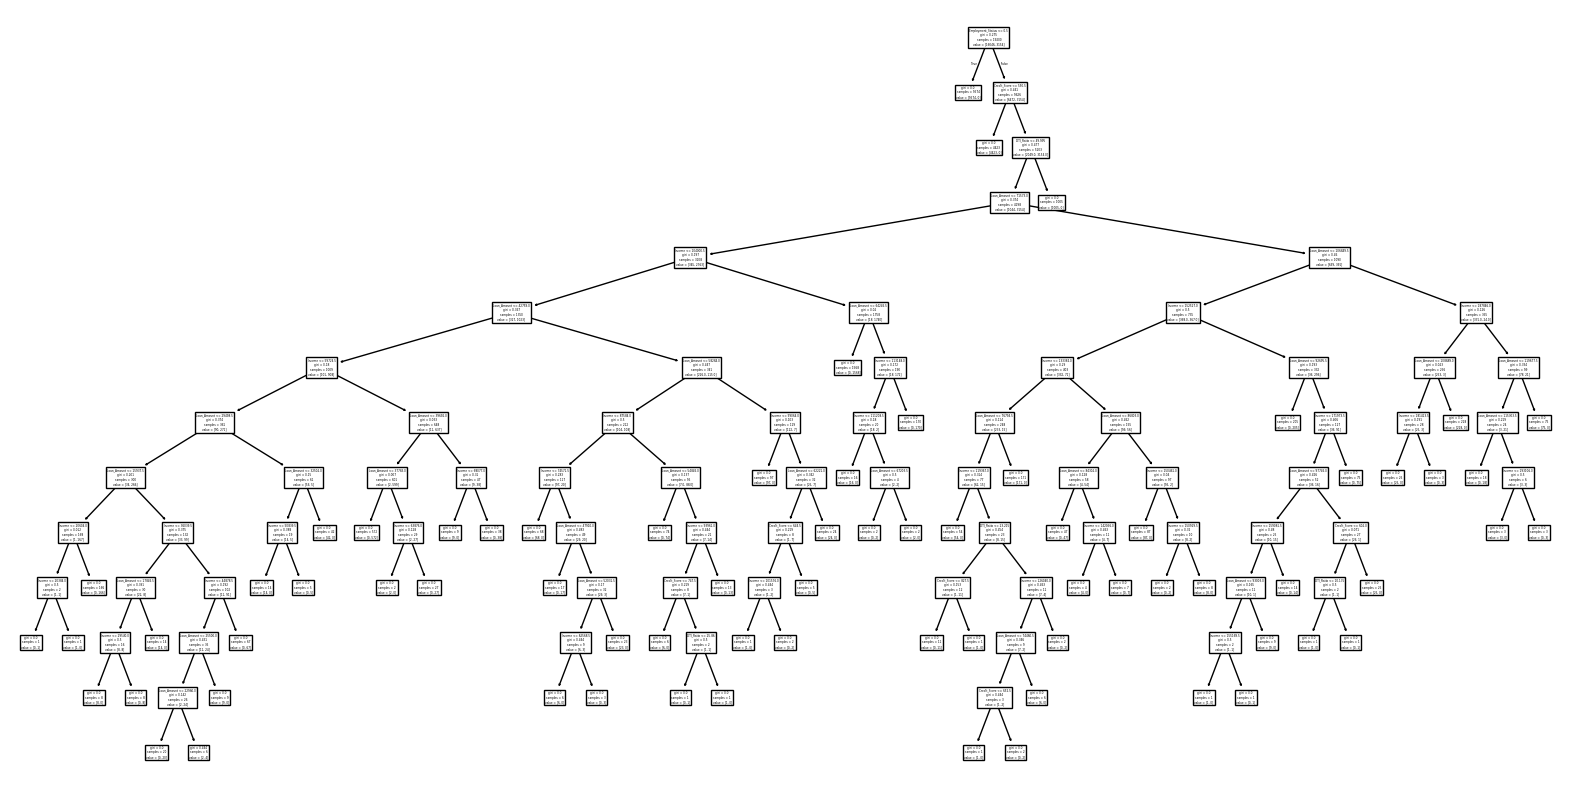

In [268]:
plt.figure(figsize=(20,10))
plot_tree(tree, feature_names=X.columns)
plt.show()

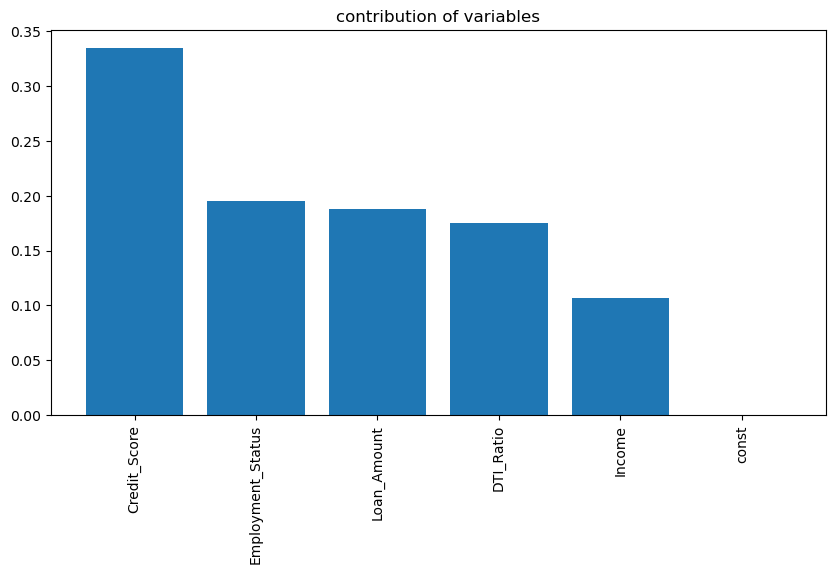

In [270]:
# Variable contribution to our model
importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,5))
plt.title("contribution of variables")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), X.columns[indices], rotation=90)
plt.show()

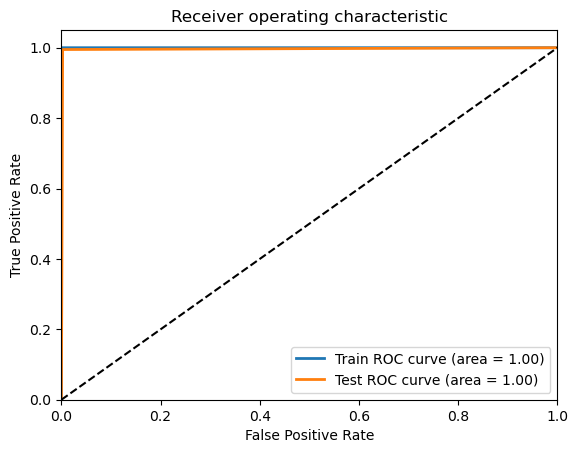

In [272]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


# Prediction on the train dataset
Y_train_pred = tree.predict(X_train)
Y_train_prob = tree.predict_proba(X_train)[:, 1]

# Prediction on the test dataset
Y_test_pred = tree.predict(X_test)
Y_test_prob = tree.predict_proba(X_test)[:, 1]


# ROC Curve of Train dataset
fpr_train, tpr_train, thresholds_train = roc_curve(Y_train, Y_train_prob)
roc_auc_train = roc_auc_score(Y_train, Y_train_prob)

# ROC Curve of Test dataset
fpr_test, tpr_test, thresholds_test = roc_curve(Y_test, Y_test_prob)
roc_auc_test = roc_auc_score(Y_test, Y_test_prob)

plt.figure()
plt.plot(fpr_train, tpr_train, label='Train ROC curve (area = %0.2f)' % roc_auc_train, linewidth=2)
plt.plot(fpr_test, tpr_test, label='Test ROC curve (area = %0.2f)' % roc_auc_test, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Using the Text Column to determine if it's consideration is significant or not.

In [275]:
Data_set = pd.read_excel("C:/Users/MERLIN/Downloads/Loan_Prediction_Clean_Data.xlsx")
Data_set.head()

,Text,Income,Credit_Score,Loan_Amount,DTI_Ratio,Employment_Status,Approval
0,I need a loan to pay for an international vaca...,26556,581,8314,79.26,employed,Rejected
1,I want to make home improvements like installi...,197392,389,111604,22.14,employed,Rejected
2,I need a loan for home renovation including a ...,44561,523,34118,45.44,employed,Rejected
3,I need funds to buy new furniture and applianc...,190363,729,118757,10.22,unemployed,Rejected
4,I need a loan to start a small business.,61853,732,19210,44.13,employed,Approved


In [277]:
text_category_mapping = {
   "I need funds to upgrade my computer and buy software for freelance work.": "Business",
    "I need money to pay for a vocational training course in plumbing.": "Training",
    "I need a loan for home renovation including a kitchen remodel.": "Expenses",
    "I want to purchase land to start an organic farming venture.": "Business",
    "I need a loan to cover moving expenses after being transferred to another city.": "Expenses",
    "I need money to cover unexpected medical expenses from surgery.": "Expenses",
    "I need a loan to buy a truck and start a moving business.": "Business",
    "I need financial assistance to launch my own YouTube content creation business.": "Business",
    "I need a loan to pay for a down payment on my first home.": "Expenses",
    "I want to expand my small online clothing store.": "Business",
    "I need money to refinance my home loan at a lower interest rate.": "Expenses",
    "I need financial help to cover wedding expenses  including the venue and catering.": "Expenses",
    "I need a loan to develop and launch my mobile app startup.": "Business",
    "I need a loan to cover emergency expenses after a natural disaster.": "Expenses",
    "I want to start a local transportation service and need funds for a van.": "Business",
    "I need money to cover unexpected legal expenses related to a dispute.": "Expenses",
    "I need money to purchase specialized tools for my auto repair shop.": "Treatment",
    "I need financial support for medical treatment abroad.": "Business",
    "I need money to invest in stock trading and portfolio building.": "Business",
    "I need financial support to open a daycare center in my neighborhood.": "Business",
    "I need financial assistance to buy farm equipment for my agricultural business.": "Business",
    "I need money to open a small bookstore and cafe.": "Business",
    "I need a loan to pay for my son's medical treatment and therapy.": "Expenses",
    "I want to pay off my payday loans and switch to a lower-interest option.": "Treatment",
    "I need financial support to pay for my son's football training program.": "Training",
    "I need financial support to renovate my rental apartment.": "Expenses",
    "I need a loan to pay for a digital marketing course to grow my business.": "Training",
    "I need a loan to repair my car after an accident.": "Expenses",
    "I need a loan to pay off overdue electricity and water bills.": "Expenses",
    "I need financial help to cover wedding expenses including the venue and catering.": "Expenses",
    "I need money to purchase updated equipment for my photography business.": "Business",
    "I need a loan to pay for a much-needed vacation after years of saving.": "Vacation",
    "I need money to publish and market my self-written book.": "Business",
    "I need a loan to pay for an international vacation with my family.": "Vacation",
    "I need a loan to relocate to a new city after getting a job offer.": "Expenses",
    "I need a loan to pay for legal fees related to my business license.": "Expenses",
    "I need a loan for home renovation  including a kitchen remodel.": "Business",
    "I need funds to expand my home-based bakery to a physical store.": "Business",
    "I need money to start a home-based catering business.": "Business",
    "I need a loan to upgrade my small music studio with better equipment.": "Business",
    "I need a loan to finance my MBA and career advancement.": "Business",
    "I want to invest in livestock to start a small dairy farm.": "Business",
    "I need financial help to build my dream home in the countryside.": "Expenses",
    "I need a loan to cover hospital bills after an unexpected surgery.": "Expenses",
    "I want to buy a car for my rideshare business on Uber.": "Expenses",
    "I need financial help to pay off my high-interest payday loans.": "Business",
    "I need money to invest in a franchise business opportunity.": "Business",
    "I want to consolidate my credit card debts into one manageable payment.": "Expenses",
    "I want to start a small roadside food stall and need funds for equipment.": "Business",
    "I need funds to buy new furniture and appliances for my house.": "Expenses",
    "I need a loan to build a website and market my freelance services.": "Business",
    "I want to make home improvements like installing solar panels.": "Expenses",
    "I need a loan to start a small business.": "Business",
    "I want to start a mobile pet grooming service and need funds for supplies.": "Business",
    "I need funds to pay for my pilot training program.": "Training",
    "I need funds to enroll in a professional certification program.": "Training",
    "I need funds to launch my handmade jewelry brand online.": "Business",
    "I need money to cover funeral expenses for a loved one.": "Business",
    "I need money to purchase a food truck and start my own business.": "Expenses",
    "I need a loan to install a security system at home.": "Security",
    "I need a loan to buy a motorcycle for daily transportation.": "Expenses",
    "I need money to buy new tools and materials for my woodworking business.": "Business",
    "I need financial help to cover unexpected veterinary bills for my pet.": "Business",
    "I need financial help to cover maternity and delivery expenses.": "Expenses",
    "I want to invest in a rental property as a source of passive income.": "Expenses",
    "I need financial help to install a swimming pool in my backyard.": "Expenses",
    "I need a loan to buy a reliable used car for work commuting.": "Expenses",
    "I need money to launch my own tech startup focused on AI solutions.": "Expenses",
    "I need money to cover adoption fees and related expenses.": "Business",
    "I need a loan to support my side business selling handmade candles.": "Training",
    "I need funds to pay for my daughter's college tuition.": "Business",
    "I need funds to stock inventory for my new retail store.": "Business",
}

# Create a new column 'Category' by mapping
Data_set['Reason'] = Data_set['Text'].map(text_category_mapping)

In [279]:
Data_set.drop("Text",axis=1,inplace=True)

In [281]:
Data_set.isnull().sum()

Income               0
Credit_Score         0
Loan_Amount          0
DTI_Ratio            0
Employment_Status    0
Approval             0
Reason               0
dtype: int64

In [283]:
# Show unique values (classes) in each column
for col in ["Reason", "Employment_Status", "Approval"]:
    print(f"Unique classes in '{col}':")
    print(Data_set[col].unique())
    print("-" * 40)

Unique classes in 'Reason':
['Vacation' 'Expenses' 'Business' 'Security' 'Treatment' 'Training']
----------------------------------------
Unique classes in 'Employment_Status':
['employed' 'unemployed']
----------------------------------------
Unique classes in 'Approval':
['Rejected' 'Approved']
----------------------------------------


In [285]:
# Extract numerical variables (columns with numeric data types)
num_vars = Data_set.select_dtypes(include=['number']).columns.tolist()

# Extract categorical variables (columns with non-numeric data types)
cat_vars = Data_set.select_dtypes(exclude=['number']).columns.tolist()

print("Numerical Variables:", num_vars)
print("Categorical Variables:", cat_vars)

Numerical Variables: ['Income', 'Credit_Score', 'Loan_Amount', 'DTI_Ratio']
Categorical Variables: ['Employment_Status', 'Approval', 'Reason']


#### Value count of each categorical variable

In [288]:
for col in cat_vars:
    print(f"--- Number of appearances '{col}' ---")
    print(Data_set[col].value_counts())
    print("\n")

--- Number of appearances 'Employment_Status' ---
Employment_Status
unemployed    12007
employed      11993
Name: count, dtype: int64


--- Number of appearances 'Approval' ---
Approval
Rejected    20067
Approved     3933
Name: count, dtype: int64


--- Number of appearances 'Reason' ---
Reason
Business     10988
Expenses      9236
Training      2058
Treatment      706
Vacation       685
Security       327
Name: count, dtype: int64




### Graphical representation of our variable Reason

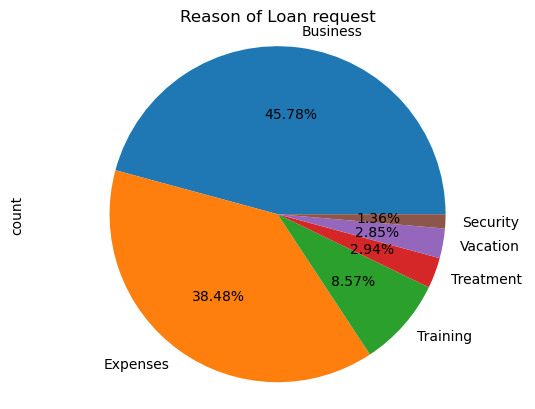

In [291]:
Data_set["Reason"].value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.title("Reason of Loan request")
plt.axis('equal')
plt.show()

### Graphical representation of  Approval vs Reason

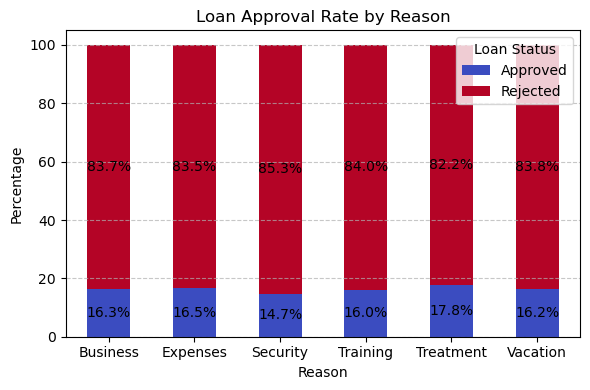

In [294]:
# Créer un tableau croisé avec pourcentages
cross_tab = pd.crosstab(Data_set['Reason'], Data_set['Approval'], normalize='index') * 100

# Création du graphique
ax = cross_tab.plot(kind='bar', stacked=True, figsize=(6, 4), colormap='coolwarm')

# Ajouter les pourcentages sur les barres
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.1f}%', 
                    (p.get_x() + p.get_width() / 2, p.get_y() + height / 2),
                    ha='center', va='center', fontsize=10, color='black')

# Personnalisation du graphique
plt.title('Loan Approval Rate by Reason')
plt.ylabel('Percentage')
plt.xlabel('Reason')
plt.legend(title='Loan Status')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

- The graph shows the proportion of loans **Approved** or **Rejected** regarding the differents cases presented by the varaible **Reason**.

In [297]:
# Map Yes/No to 1/0 for the categorical columns
Data_set['Approval'] = Data_set['Approval'].map({'Approved': 1, 'Rejected': 0})
Data_set['Employment_Status'] = Data_set['Employment_Status'].map({'employed': 1, 'unemployed': 0})
#data['Premium'] = data['Premium'].map({'yes': 1, 'no': 0})

# Verify the changes
print(Data_set.head())

   Income  Credit_Score  Loan_Amount  DTI_Ratio  Employment_Status  Approval  \
0   26556           581         8314      79.26                  1         0   
1  197392           389       111604      22.14                  1         0   
2   44561           523        34118      45.44                  1         0   
3  190363           729       118757      10.22                  0         0   
4   61853           732        19210      44.13                  1         1   

     Reason  
0  Vacation  
1  Expenses  
2  Expenses  
3  Expenses  
4  Business  


### Let's determine if our new variable provides valuable information for the model we want to build.

In [300]:
from scipy.stats import chi2_contingency
import numpy as np
# Sélectionner les variables catégorielles
cat_vars=['Reason']

# Initialiser les listes pour stocker les résultats
var_names = []
chi2_stats = []
p_values = []
cramer_vs = []
#decision = []

# Parcourir toutes les variables catégorielles
for var in cat_vars:
    # Calculer le tableau de contingence
    contingency_table = pd.crosstab(Data_set['Approval'], Data_set[var])
    # Calculer la statistique de test du Chi-deux et la p-valeur
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    # Calculer le coefficient V de Cramer
    n = contingency_table.sum().sum()
    phi2 = chi2/n
    r,k = contingency_table.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rc = r-((r-1)**2)/(n-1)
    kc = k-((k-1)**2)/(n-1)
    cramer_v = np.sqrt(phi2corr/min(rc-1,kc-1))
    # Ajouter les résultats aux listes correspondantes
    var_names.append(var)
    chi2_stats.append(chi2)
    p_values.append(p)
    cramer_vs.append(cramer_v)
   # decisions.append("Accepted" if p < alpha else "Rejeted")

# Créer un DataFrame avec les résultats
results_df = pd.DataFrame({
    'Variable': var_names,
    'Chi2': chi2_stats,
    'P-valeur': p_values,
    'V de Cramer': cramer_vs,
   # 'Decision': decisions
})

# Trier le DataFrame par ordre croissant de V de Cramer
results_df.sort_values(by='V de Cramer', inplace=True,ascending=False)

# Afficher le tableau des résultats
print(results_df)

  Variable      Chi2  P-valeur  V de Cramer
0   Reason  2.245461  0.814243          0.0


In [302]:
#### One-Hot Encoding

In [304]:
encoded_reason = pd.get_dummies(Data_set['Reason'], prefix='Reason',dtype=int)
Data_set = pd.concat([Data_set, encoded_reason], axis=1)
Data_set.drop('Reason', axis=1, inplace=True)

In [306]:
Data_set.head()

,Income,Credit_Score,Loan_Amount,DTI_Ratio,Employment_Status,Approval,Reason_Business,Reason_Expenses,Reason_Security,Reason_Training,Reason_Treatment,Reason_Vacation
0,26556,581,8314,79.26,1,0,0,0,0,0,0,1
1,197392,389,111604,22.14,1,0,0,1,0,0,0,0
2,44561,523,34118,45.44,1,0,0,1,0,0,0,0
3,190363,729,118757,10.22,0,0,0,1,0,0,0,0
4,61853,732,19210,44.13,1,1,1,0,0,0,0,0


In [308]:
from scipy.stats import chi2_contingency
import numpy as np
# Sélectionner les variables catégorielles
cat_vars=['Reason_Business', 'Reason_Expenses', 'Reason_Security', 'Reason_Training', 'Reason_Treatment', 'Reason_Vacation']

# Initialiser les listes pour stocker les résultats
var_names = []
chi2_stats = []
p_values = []
cramer_vs = []
#decision = []

# Parcourir toutes les variables catégorielles
for var in cat_vars:
    # Calculer le tableau de contingence
    contingency_table = pd.crosstab(Data_set['Approval'], Data_set[var])
    # Calculer la statistique de test du Chi-deux et la p-valeur
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    # Calculer le coefficient V de Cramer
    n = contingency_table.sum().sum()
    phi2 = chi2/n
    r,k = contingency_table.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rc = r-((r-1)**2)/(n-1)
    kc = k-((k-1)**2)/(n-1)
    cramer_v = np.sqrt(phi2corr/min(rc-1,kc-1))
    # Ajouter les résultats aux listes correspondantes
    var_names.append(var)
    chi2_stats.append(chi2)
    p_values.append(p)
    cramer_vs.append(cramer_v)
   # decisions.append("Accepted" if p < alpha else "Rejeted")

# Créer un DataFrame avec les résultats
results_df = pd.DataFrame({
    'Variable': var_names,
    'Chi2': chi2_stats,
    'P-valeur': p_values,
    'V de Cramer': cramer_vs,
   # 'Decision': decisions
})

# Trier le DataFrame par ordre croissant de V de Cramer
results_df.sort_values(by='V de Cramer', inplace=True,ascending=False)

# Afficher le tableau des résultats
print(results_df)

           Variable      Chi2  P-valeur  V de Cramer
4  Reason_Treatment  1.023782  0.311624     0.000995
0   Reason_Business  0.081543  0.775218     0.000000
1   Reason_Expenses  0.215433  0.642542     0.000000
2   Reason_Security  0.585560  0.444141     0.000000
3   Reason_Training  0.233261  0.629117     0.000000
5   Reason_Vacation  0.006241  0.937031     0.000000


### Interpretation of Results

- Based on the results obtained before and after encoding our variable **Reason**, the statistics shows that this variable does not provide valuable information to our model. 